In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/archive.zip")

In [ ]:
print (df.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [ ]:
df.describe()

,money
count,896.000000
mean,34.143906
std,4.573951
min,23.020000
25%,28.900000
50%,34.500000
75%,37.720000
max,40.000000


In [ ]:
df.shape

(896, 6)

In [ ]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [ ]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [ ]:
df.nunique()

date           119
datetime       896
cash_type        2
card           337
money           15
coffee_name      8
dtype: int64

In [ ]:
print(df)

           date                 datetime cash_type                 card  \
0    2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1    2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2    2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3    2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4    2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
..          ...                      ...       ...                  ...   
891  2024-06-29  2024-06-29 21:27:22.449      card  ANON-0000-0000-0009   
892  2024-06-30  2024-06-30 10:28:09.842      card  ANON-0000-0000-0336   
893  2024-06-30  2024-06-30 13:05:50.620      card  ANON-0000-0000-0337   
894  2024-06-30  2024-06-30 16:54:41.679      card  ANON-0000-0000-0009   
895  2024-06-30  2024-06-30 21:04:09.746      card  ANON-0000-0000-0097   

     money          coffee_name  
0    38.70                Latte  
1    38.70        Hot Chocolate

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
     try:
       df[col] = pd.to_numeric(df[col], errors='coerce')
     except ValueError:
       pass

In [ ]:
df.mean()

date                 NaN
datetime             NaN
cash_type            NaN
card                 NaN
money          34.143906
coffee_name          NaN
dtype: float64

In [ ]:
df.median()

date            NaN
datetime        NaN
cash_type       NaN
card            NaN
money          34.5
coffee_name     NaN
dtype: float64

In [ ]:
df.std()

date                NaN
datetime            NaN
cash_type           NaN
card                NaN
money          4.573951
coffee_name         NaN
dtype: float64

In [ ]:
df['money'].mean()

34.14390625

In [ ]:
df['money'].median()

34.5

In [ ]:
df["money"].std()

4.57395096232199

In [ ]:
q1 = df["money"].quantile(0.25)
print(q1)


28.9


In [ ]:
q3 = df["money"].quantile(0.75)
print(q3)

37.72


In [ ]:
lower_bound = q1 - 1.5 * (q3 - q1)
print(lower_bound)

15.669999999999998


In [ ]:
upper_bound = q3 + 1.5 * (q3 - q1)
print(upper_bound)

50.95


<function matplotlib.pyplot.show(close=None, block=None)>

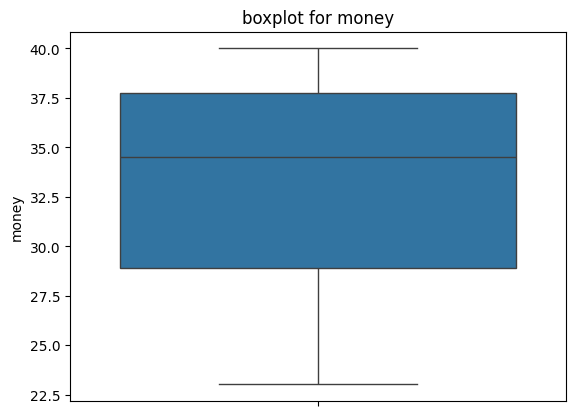

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['money'])
plt.title(f'boxplot for money')
plt.show

In [ ]:
df.corr()

,date,datetime,cash_type,card,money,coffee_name
date,NaN,NaN,NaN,NaN,NaN,NaN
datetime,NaN,NaN,NaN,NaN,NaN,NaN
cash_type,NaN,NaN,NaN,NaN,NaN,NaN
card,NaN,NaN,NaN,NaN,NaN,NaN
money,NaN,NaN,NaN,NaN,1.0,NaN
coffee_name,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouped_data=df.groupby('money')['card']

In [ ]:
mean_value=grouped_data.mean()
sum_value=grouped_data.sum()
median_value=grouped_data.median()
print(mean_value)
print(sum_value)
print(median_value)


money
23.02   NaN
24.00   NaN
25.00   NaN
27.92   NaN
28.90   NaN
29.00   NaN
30.00   NaN
32.82   NaN
33.80   NaN
34.00   NaN
35.00   NaN
37.72   NaN
38.70   NaN
39.00   NaN
40.00   NaN
Name: card, dtype: float64
money
23.02    0.0
24.00    0.0
25.00    0.0
27.92    0.0
28.90    0.0
29.00    0.0
30.00    0.0
32.82    0.0
33.80    0.0
34.00    0.0
35.00    0.0
37.72    0.0
38.70    0.0
39.00    0.0
40.00    0.0
Name: card, dtype: float64
money
23.02   NaN
24.00   NaN
25.00   NaN
27.92   NaN
28.90   NaN
29.00   NaN
30.00   NaN
32.82   NaN
33.80   NaN
34.00   NaN
35.00   NaN
37.72   NaN
38.70   NaN
39.00   NaN
40.00   NaN
Name: card, dtype: float64
